In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Отбор признаков</b></h3>

<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><a href="#1"><li>Проблема отбора признаков.</li></a>
    <a href="#2"><li>Методы отбора признаков.</li></a><ul><a href="#3"><li>Корреляция признаков</li></a><a href="#4"><li>Т-статистика</li></a><a href="#5"><li>Встроенные алгоритмы</li></a></ul><a href="#6"><li>Методы преобразования признаков.</li></a><ul><a href="#7"><li>Метод главных компонент (PCA)</li></a><a href="#8"><li>Линейный дискриминантный анализ (LDA)</li></a></ul><a href="#9"><li>Практика. Отбор признаков.</li></a><a href="#10"><li>Практика. PCA.</li></a></font></p>

<h2>Проблема отбора признаков</h2>
<p id="1">Во многих задачах, наряду с проблемами качества данных и работы с переменнами встает проблема отбора признаков. Как известно, существует так называемое <i><b>проклятие размерности</b></i>, когда есть какая-то модель, и при увеличении кол-ва признаков, не изменяя при этом кол-во объектов, качество будет быстро и уверенно расти, и дойдя до какого-то оптимального числа признаков, начнет медленно падать. Поэтому если в задаче есть достаточно большое кол-во признаков, встает проблема отбора оптимального числа признаков.</p>
<p style="align: center;"><img align=center src="https://www.machinelearningmastery.ru/img/0-125865-67461.png"  width=900></p>
<div class="alert alert-info">В таких случаях (когда признаков много, а объектов мало), правильный отбор признаков позволит получить:
<ul><li>Упрощение моделей для того, чтобы сделать их проще для интерпретации исследователями или пользователями</li><li>Более короткое время обучения</li><li>Уменьшение влияния проклятия размерности</li><li>Улучшение обощения путем сокращения переобучения</li><li>Фультрацию шумных признаков</li></ul></div>

<h2>Методы отбора признаков</h2>
<p id="2">Итак, перед нами стоит задача найти подмножество признаков, на котором выбранная нами модель покажет наилучшее качество. Рассмотрим некоторые методы отбора признаков. Всех их можно разделить на три общие группы.</p>
<div class="alert alert-info"><ul><li><b>Фильтры</b> - основаны на некоторых показателях, которые не зависят от метода классификации (например, коэффициент корреляции, взаимная информация, WOE, IG).</li>
    <li><b>Обертки</b> - опираются на информацию о важности признаков полученную от других методой или моделей ML (например, последовательный отбор и последовательное исключение признаков).</li>
    <li><b>Встроенные алгоритмы</b> - выполняют отбор признаков во время процедуры обучения, и именно они явно оптимизируют набор используемых признаков для достижения лучшей точности (например, регрессия с L1-регуляризацией, Random Forest, SHAP).</li></ul></div>
<p style="align: center;"><img align=center src="https://sun9-45.userapi.com/impg/8vhqGEncl1FjBrEX66tZiydompnUROyer3nMww/r1bPPdy3wdg.jpg?size=917x433&quality=96&sign=0b2594b60baf0256b7723652d7286e92&type=album"  width=900></p>

<h3>Корреляция признаков</h3>
<p id="3">Самое простое и очевидное, что может помочь - это корреляция, когда  у нас есть таргетная переменная и она коррелирует с каким-то одним или несколькими признаками. Здесь можно видеть пример корреляции кол-во ресторанов Икеа в стране с кол-вом нобелевских лауреатов, представляющих эту страну.</p>
<p style="align: center;"><img align=center src="https://sun9-58.userapi.com/impg/rbejCjq6QcetkV7WYrP4J_-zdnWFRPVANeW-gA/dFvffhQZUWc.jpg?size=1591x625&quality=96&sign=b40fce90de0ad3353eef4d40ff0395c1&type=album"  width=900></p>
С помощью матрицы корреляций можно выявлять ярко выраженные корреляции и отбирать признаки так, чтобы они сильно коррелировали с таргетной переменной и слабо коррелировали между собой.

<h3>Т-статистика</h3>
<p id="4">Рассмотрим еще один статистический критерий отбора признаков. Т-статистика позволяет оценить отношение разницы параметра и номинальной величины к стандартной ошибке.$$t = \frac{\hat{\beta_i} - 0}{\sigma(\hat{\beta_i})}$$
<ul><li>Если между $x_i$ и $y$ нет зависимости, то t соотвествует t-распределению с n-2 степенями свободы.</li><li>p-value - вероятность того, что про известном распределении наблюдаемое значение $\geq |t|$ (величина достоверности)</li><li>Если p-value достаточно маленький ($<1\%$), то мы можем отсеить признак</li></ul></p>
<p style="align: center;"><img align=center src="https://baguzin.ru/wp/wp-content/uploads/2018/10/Ris.-10.-Raspolozhenie-nablyudaemogo-znacheniya-koeffitsienta-regressii.jpg"  width=900></p>

<h3>Встроенные алгоритмы</h3>
<p id="5">Есть три наиболее известных методов, которые встроены в алгоритмы. Это Random Forest, L1-регуляризация и SHAP. На картинке видна иллюстрация работы этих алгоритмов.</p>
<ol><li>С помощью Random Forest, можно отобрать наиболее эффективные признаки, которые имеют какие-то большие значения (скор), или, например, задать определенный трэшхолд по скору, и отбирать признаки на основе этого.</li><li>Как известно, L1-регуляризация зануляет коэффициенты у признаков с ростом коэффициента регуляризации. Сначала зануляются менее важные признаки, при малых значениях коэффициента, а затем все остальные (далее рассмотрим на практике). Таким образом также можно отобрать наиболее подходящие признаки.</li><li>SHAP (SHapley Additive exPlanations) - метод, основанный на представлении теории игр. Модель анализирует влияние каждого признака, и тем самым, построив график важности влияния признаков можно увидеть размах признака, насколько он "важен" для тагретной переменной, и отобрать нужные признаки.</li></ol>

<p style="align: center;"><img align=center src="https://sun9-57.userapi.com/impg/UPdkBreVdi9xe1GYMcKjOkOGHqjBUfoK9NlaQQ/iRRvj5quTm0.jpg?size=1493x905&quality=96&sign=d65847e63b570a4b78a51da3067554a1&type=album"  width=900></p>

<h2>Методы преобразования признаков</h2>
<p id="6">Помимо перечисленных методов отбора признаков существуют методы преобразования признаков. Рассмотрим некоторые из них в теории, а затем на практике.</p>
<h3>Метод главных компонент (PCA)</h3>
<p id="7">Чтобы побороть проклятье размерности и корреляцию между признаками, зачастую используют метод главных компонент. Этот метод позволяет найти направление, относительно которого данные имеют самую большую дисперсию, и ортогональное к нему. 
    В методе главных компонент ключевую роль играет SVD-разложение, которое раскладывает матрицу на три составляющих, где первая - это матрица состоящая из правых собственных векторов, средняя - диагональная матрица из собственных чисел, а последняя - из левых собственных векторов.</p>
<p style="align: center;"><img align=center src="https://intoli.com/blog/pca-and-svd/img/svd-matrices.png"  width=900></p>
<p>Таким образом, мы побороли корреляции между призаками. Если построить матрицу ковариаций из преобразованных компонент, она будет диагональна.</p><br>
$$Cov(X_i,X_j) = E [(X_i - E(X_i))\cdot (X_j - E(X_j))] = E(X_iX_j) - E(X_i)\cdot E(X_j)$$
<div class="alert alert-info"><b>Замечание:</b> Ковариационная матрица является обобщением дисперсии на случай многомерных случайных величин – она так же описывает форму (разброс) случайной величины, как и дисперсия.</div>

<h3>Линейный дискриминантный анализ (LDA)</h3>
<p id="8">Метод уменьшения размерности, используемый в качестве этапа предварительной обработки в приложениях машинного обучения и классификации. Данный метод можно разделить на три этапа:</p>
<ul><li>Первый этап - вычислить разделимость между разными классами (расстоение между средними значениями разных классов), также называемое межклассовой дисперсией $$S_b = \sum\limits_{i=1}^g N_i(\overline{x_i} - \overline{x})(\overline{x_i} - \overline{x})^T$$</li><li>Второй этап - вычислить расстояние между средним значением и выборкой каждого класса, которое называется внутриклассовой дисперсией. $$S_w=\sum\limits_{i=1}^g (N_i - 1)S_i = \sum\limits_{i=1}^g\sum\limits_{j=1}^{N_i}(\overline{x_{i,j}} - \overline{x_i})(\overline{x_{i,j}} - \overline{x_i})^T$$</li>
<li>Третий этап - построить пространство более низкой размерности, которое максимизирует дисперсию между классами и минимизирует дисперсию внутри класса. Р-проекция пространства нижней размерности, которая называется критерием Фишера. $$P_{lda} = arg\max_P \frac{|P^TS_bP|}{|P^T S_wP|}$$</li></ul>



<p style="align: center;"><img align=center src="https://sun9-61.userapi.com/impg/Cmar849VnibCdL1KOWAyk2lQzzI260tRd0HHIA/uqe18bXObCc.jpg?size=1509x783&quality=96&sign=2dc9f0d2aa73cffc061d461251d51553&type=album"  width=900></p>

<div class="alert alert-info"><i>В чем же разница между PCA и LDA?</i>
<p>PCA - пытается найти максимально большие компоненты, покрывающие наибольшую дисперсию таргетной переменной, и постепенно покрывает всю дисперсию данных. После этого самые незначительные компоненты можно отбросить. В свою очередь, LDA - пытается найти, такую проекцию, при которой классы будут максимально разделимы. При этом, и в том, и в другом методе можно снизить кол-во компонент.</p></div>
<p style="align: center;"><img align=center src="https://sun1-47.userapi.com/impg/8-OSwTJqgpU590Q2_Wr2f5d3_ZVUqwooEOfH6A/2Ea4J9bNlmM.jpg?size=1333x625&quality=96&sign=37b49a2f73fd19dbfe0d7ebb34115fd2&type=album"  width=900></p>

<h2>Практика. Отбор признаков.</h2>
<p id="9">Рассмотрим методы отбора признаков на практике.</p>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

Подгружаем датасет.

In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('https://raw.githubusercontent.com/flaymax/tmp/master/pima-indians-diabetes.csv', names=names)

Самое первое и очевидное, что можно сделать для отбора признаков - это посмотреть на матрицу корреляций. Строим ее. Здесь достаточно хорошо видно, какие признаки хорошо коррелируют между собой и было бы неплохо их выкинуть.

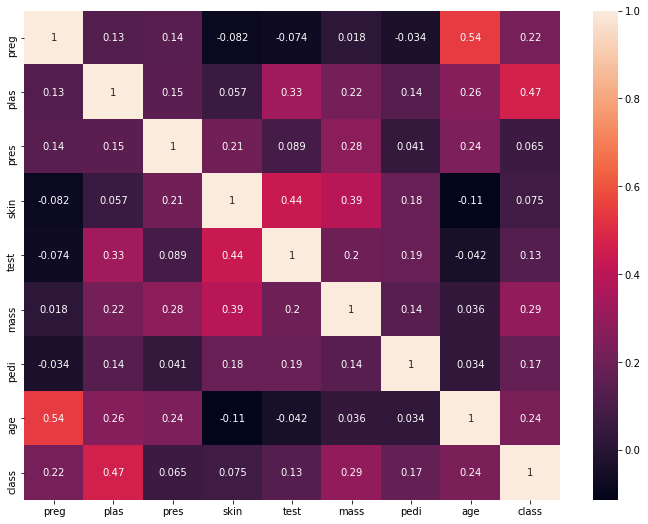

In [ ]:
corr = dataframe.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

Также можно посмотреть зависимости между конкретными переменными на графиках pairplot. Также здесь можно увидеть выбросы или пропущенные значения.

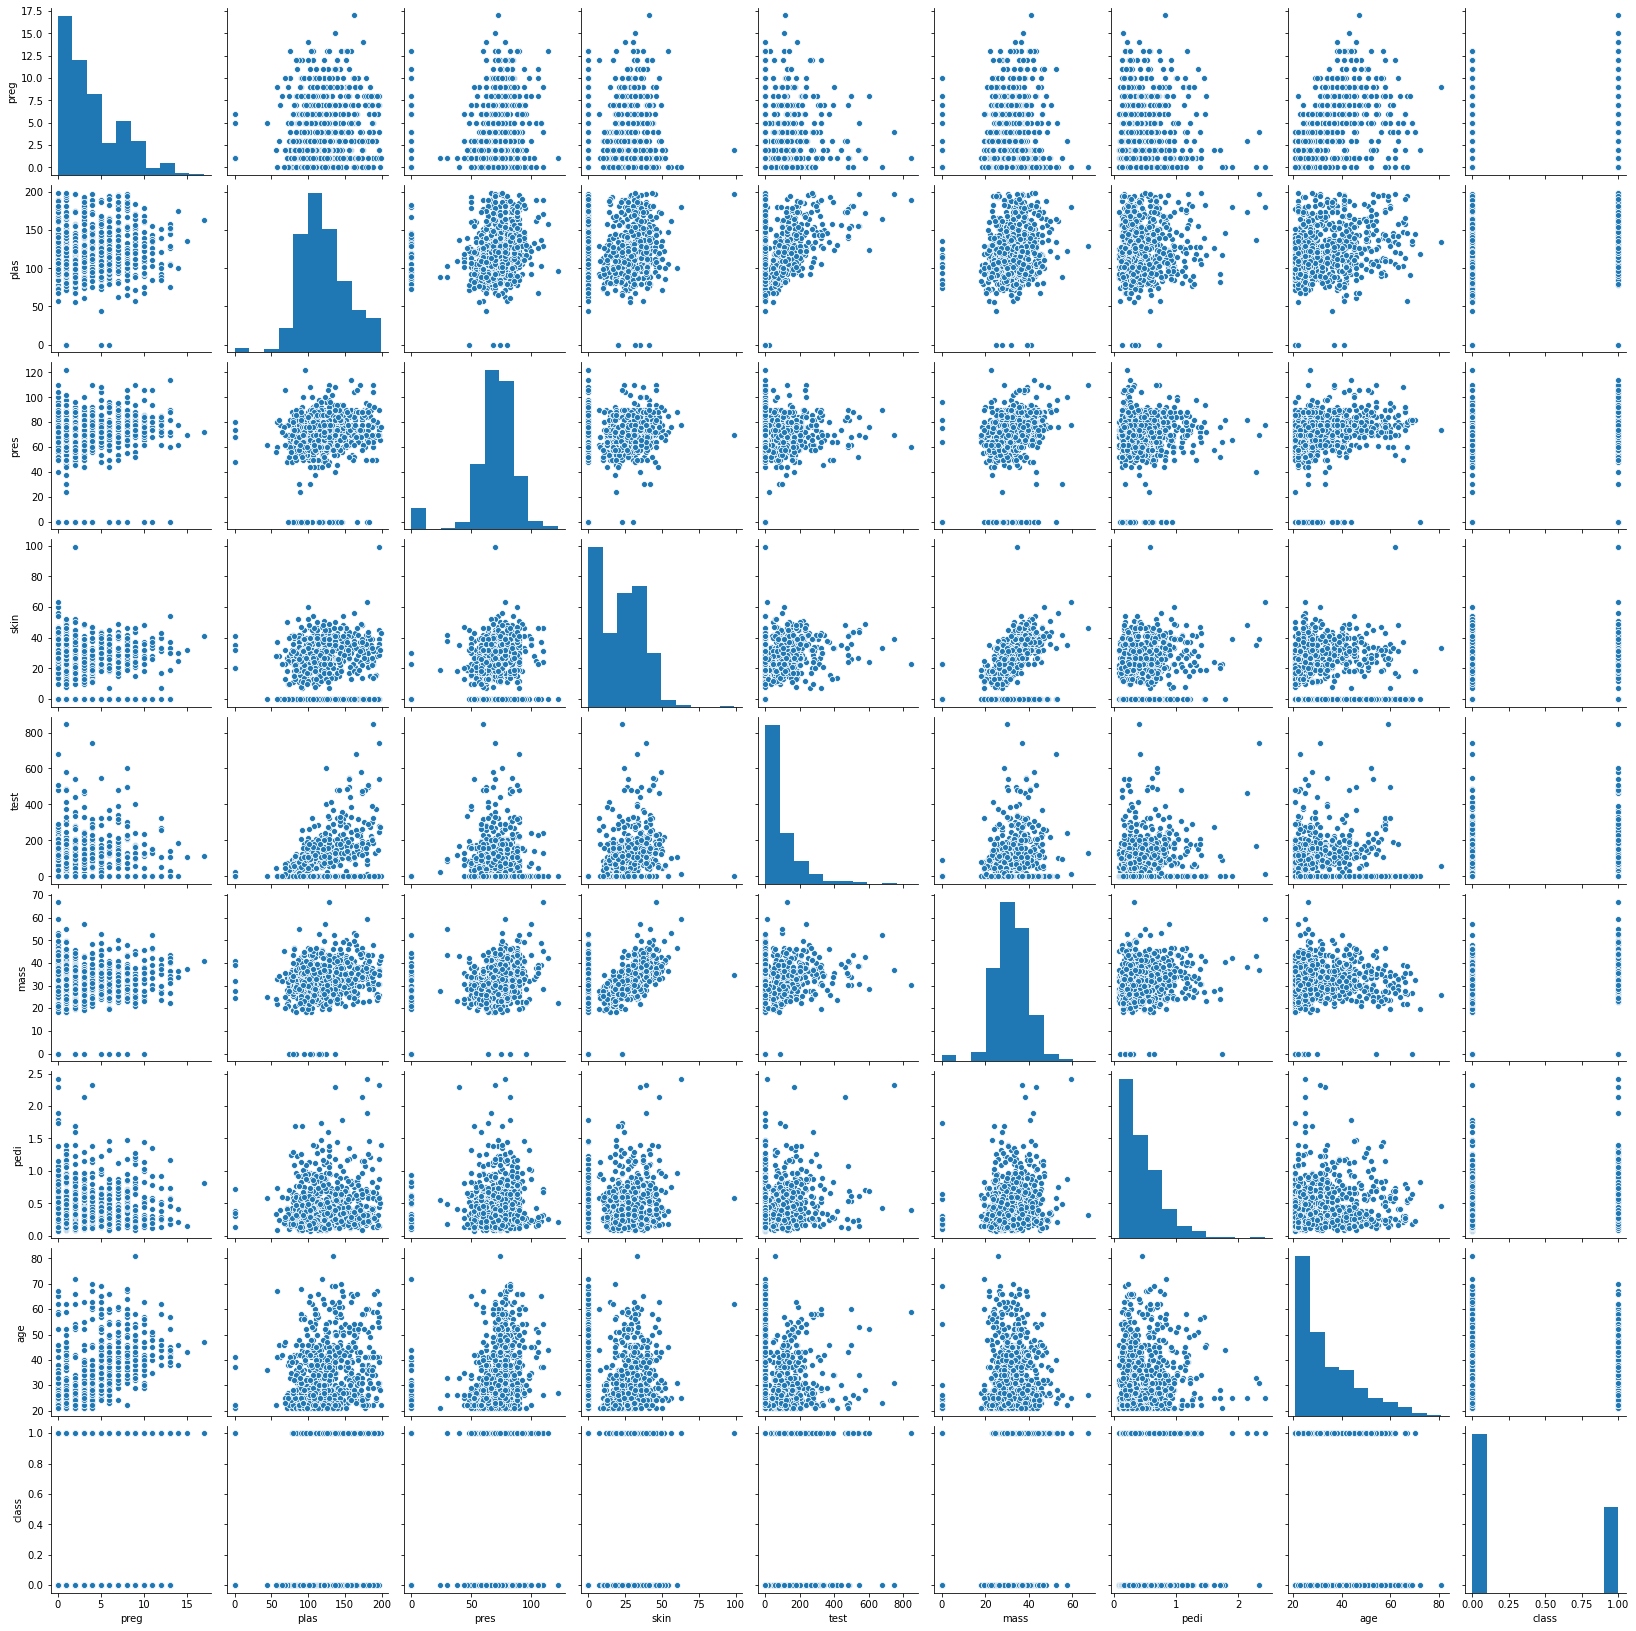

In [ ]:
sns.pairplot(dataframe)

Далее построим модель на основе деревьев решений, и посмотрим важность признаков, которую она нам вернет. В итоге, снова получаем самый высокий коэффициент важности у одного признака ("plas"), которой мы видели и в матрице корреляций с таргетной переменной с наибольшей корреляцией.

In [ ]:
array = dataframe.values
X = array[:,0:8] # dataframe --> массив numpy
Y = array[:,8]
# извлечение признаков
model = ExtraTreesClassifier()
model.fit(X, Y) # обучение
for i in range(len(names)-1):
    print(f"{names[i]}\t- {model.feature_importances_[i]:.4f}")

preg	- 0.1069
plas	- 0.2406
pres	- 0.0944
skin	- 0.0802
test	- 0.0749
mass	- 0.1379
pedi	- 0.1200
age	- 0.1449


Посмотрим важность признаков с точки зрения методов L1-регуляризации

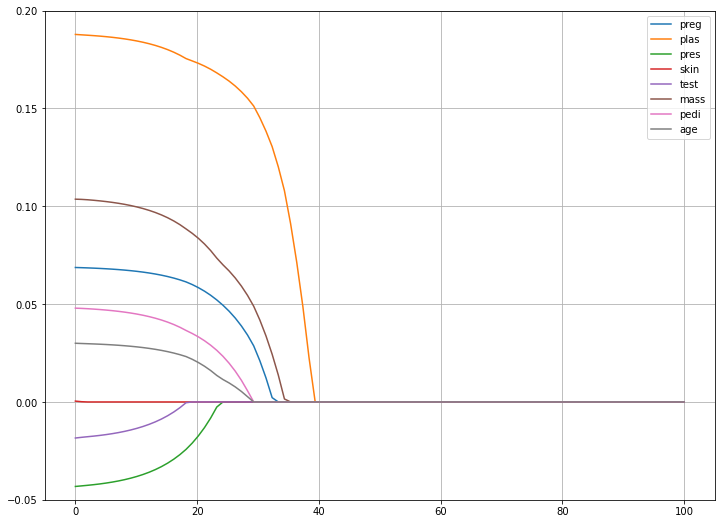

In [ ]:
from sklearn.linear_model import  Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_sc = StandardScaler().fit_transform(X) # преобразование данных
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, Y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(names)      
plt.grid()

Из этого графика можно видеть как сначала зануляются менее важные признаки, при малых значениях коэффициента, а затем по мере увеличения коэффициента регуляризации все остальные. Таким образом, можно делать выводы о важности тех или иных признаков.

<h2>Практика. PCA.</h2>
<p id="10">Рассмотрим метод главных компонент на практике. Сначала сделаем  его по алгоритму "руками", а затем рассмотрим готовый алгоритм.</p>

In [ ]:
# генерируем искусственные данные
x = np.arange(1,11) * (100 + np.random.randn(10))
y = 2 * x + np.random.randn(10)*5
X = np.vstack((x,y))

Далее действуем по алгоритму, по которому работает PCA. Для начала стандартизуем переменные.

In [ ]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean()) # вычтем из переменных среднее значение
m = (x.mean(), y.mean())
print("Средние значения: ", m) # 

Средние значения:  (550.305569883751, 1102.113451398722)


Посчитаем матрицу ковариаций. Делаем это с помощью бибилиотеки numpy.

In [ ]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Дисперсия X: ", np.cov(Xcentered)[0,0])
print("Дисперсия Y: ", np.cov(Xcentered)[1,1])
print("Ковариация X и Y: ", np.cov(Xcentered)[0,1])

[[ 92016.83573275 184466.7265273 ]
 [184466.7265273  369812.29520562]] 

Дисперсия X:  92016.83573275433
Дисперсия Y:  369812.2952056176
Ковариация X и Y:  184466.7265273024


Далее раскладываем матрицу ковариаций на собственные вектора. Берем один собственный вектор и с помощью этого вектора преобразуем наши центрованные данные в новые данные. Теперь получается вектор, который уже повернут в новом пространстве.

In [ ]:
_, vecs = np.linalg.eig(covmat)
v = vecs[:,1]
Xnew = np.dot(v, Xcentered)
print(Xnew)

[1008.05126651  787.24494029  564.98959697  339.28125615  105.46419261
  -98.36083893 -356.87241264 -556.80157416 -795.02289908 -997.97352773]


В итоге, получаем восстановленные с достаточно хорошей точностью данные.

In [ ]:
n = 8     #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Восстановленные: ', Xrestored)
print('Original: ', X[:,n])

Восстановленные:  [ 905.17582509 1813.54054678]
Original:  [ 905.64653887 1813.30574785]


Точно такую же операцию можно провернуть с помощью встроенного PCA.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1) # взяли 1 компоненту
XPCAreduced = pca.fit_transform(np.transpose(X)) # сделали трансформацию

Здесь мы можем видеть разницу между теми значениями, которые были в векторах и тем значением, которое мы получили после преобразования. Как видим все работает.

In [ ]:
for xn, x_pca in zip(Xnew, XPCAreduced):
    print(xn, '-', x_pca[0], '=', np.abs(xn - x_pca[0]))

1008.0512665149026 - 1008.0512665149024 = 2.2737367544323206e-13
787.2449402884877 - 787.2449402884876 = 1.1368683772161603e-13
564.9895969736202 - 564.9895969736201 = 1.1368683772161603e-13
339.2812561499754 - 339.2812561499753 = 5.684341886080802e-14
105.46419261327664 - 105.46419261327661 = 2.842170943040401e-14
-98.360838925969 - -98.36083892596899 = 1.4210854715202004e-14
-356.87241264321364 - -356.8724126432135 = 1.1368683772161603e-13
-556.8015741557556 - -556.8015741557556 = 0.0
-795.0228990825785 - -795.0228990825783 = 2.2737367544323206e-13
-997.9735277327461 - -997.9735277327459 = 2.2737367544323206e-13


<h2>Summary</h2>
<ol><li>Важнейшим этапом <b>предобработки</b> данных, помимо работы с выбросами и шумом, является <b>отбор признаков</b>, в тех случаях, когда признаков много, а объектов достаточно мало.</li><li>Следует помнить, что <b>скоррелированные признаки</b> могут достаточно сильно <b>усложнить</b> Вам работу при построении модели, и от них стоит <b>избавляться</b>.</li><li>Помимо  методов отбора признаков существуют методы <b>преобразования признаков</b>, которые в различных задачах достаточно <b>эффективны</b>.</li></ol>

<h3>Вопросы для самопроверки</h3>
<p><ol><li>Какие методы отбора признаков вы знаете? Для чего  нужно отбирать признаки?</li><li>В каких случаях достаточно эффетивно использовать преобразование существующих признаков?</li><li>В чем же разница между PCA и LDA, и что это такое?</li></ol></p>

<h1>Спасибо за внимание!</h1>